In [1]:
from utils import *
import pandas as pd

In [2]:
result_files, skip_sample_ids, selected_annotators, num_annotators = process_result_files()
# print(result_files)
halu_labels_list = [['Unwanted'], ['Unwanted', 'Questionable'], ['Unwanted', 'Questionable', 'Benign']]
# poolings = ['worst-pooling', 'best-pooling']
poolings = ['worst-pooling']
for halu_labels in halu_labels_list:
    for pooling in poolings:
        # Get six variables
        globals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]]= HaluEvaluator(result_files, sample_pooling=pooling, halu_labels=halu_labels, skip_sample_ids=skip_sample_ids, selected_annotators=selected_annotators, num_annotators=num_annotators)
        locals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]].process_results()
   

total_sample_count 750
total_sample_count 750
total_sample_count 750


## Hallucination Ranking Table

In [3]:
# Get halu rate
halu_rate_results = {}
columns = []
for halu_labels in halu_labels_list:
    for pooling in poolings:
        halu_result = locals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]].compute_halu_rate()
        for model, rate in halu_result.items():
            if model not in halu_rate_results:
                halu_rate_results[model] = []
            halu_rate_results[model].append(rate)
        columns.append(''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0])
halu_rate_results_df = pd.DataFrame.from_dict(halu_rate_results, orient='index', columns=columns)

# Get ranking df
df_ranked = halu_rate_results_df.copy()
## Apply ranking for each column in reverse order
for column in df_ranked.columns:
    df_ranked[column] = df_ranked[column].astype(float).rank(ascending=True, method='min').astype(int)

# Combine original scores with ranks in the desired format
df_combined = halu_rate_results_df.applymap(str) + " (" + df_ranked.applymap(str) + ")"
# model_orders = ['GPT-4o', 'GPT-3.5-Turbo', 'Llama-3.1-70B', 'Gemini-1.5-Flash', 'Llama-3.1-8B', 
#                 'Claude-3.5-Sonnet', 'Qwen2.5-7B', 'Phi-3-mini', 'Command-R', 'Mistral-7B']

model_orders = ['GPT-4o', 'GPT-3.5-Turbo', 'Qwen2.5-7B', 'Phi-3-mini', 'Claude-3.5-Sonnet', 'Command-R', 'Llama-3.1-70B', 'Llama-3.1-8B', 'Gemini-1.5-Flash',  
                'Mistral-7B']


# Sorting the DataFrame based on the given model list
df_sorted = df_combined.loc[model_orders]
df_sorted['HHEM Ldbd'] = list(range(1, 11))

# Display or further process the sorted DataFrame
# print(df_sorted.to_latex())
df_sorted


/var/folders/27/mcs38ydx4n76wzm1g1yy7vxr0000gn/T/ipykernel_21287/2108650527.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combined = halu_rate_results_df.applymap(str) + " (" + df_ranked.applymap(str) + ")"


,U-worst,UQ-worst,UQB-worst,HHEM Ldbd
GPT-4o,40.0 (1),53.33 (1),66.67 (2),1
GPT-3.5-Turbo,44.0 (2),53.33 (1),61.33 (1),2
Qwen2.5-7B,73.33 (10),78.67 (9),85.33 (9),3
Phi-3-mini,65.33 (7),74.67 (7),80.0 (6),4
Claude-3.5-Sonnet,48.0 (3),61.33 (4),82.67 (7),5
Command-R,68.0 (8),84.0 (10),92.0 (10),6
Llama-3.1-70B,48.0 (3),54.67 (3),68.0 (3),7
Llama-3.1-8B,53.33 (5),66.67 (6),77.33 (5),8
Gemini-1.5-Flash,56.0 (6),64.0 (5),69.33 (4),9
Mistral-7B,69.33 (9),77.33 (8),84.0 (8),10


In [4]:
latex_code = df_sorted.to_latex(index=True)  # index=False if you don't want to include row indices
print(latex_code)

\begin{tabular}{llllr}
\toprule
 & U-worst & UQ-worst & UQB-worst & HHEM Ldbd \\
\midrule
GPT-4o & 40.0 (1) & 53.33 (1) & 66.67 (2) & 1 \\
GPT-3.5-Turbo & 44.0 (2) & 53.33 (1) & 61.33 (1) & 2 \\
Qwen2.5-7B & 73.33 (10) & 78.67 (9) & 85.33 (9) & 3 \\
Phi-3-mini & 65.33 (7) & 74.67 (7) & 80.0 (6) & 4 \\
Claude-3.5-Sonnet & 48.0 (3) & 61.33 (4) & 82.67 (7) & 5 \\
Command-R & 68.0 (8) & 84.0 (10) & 92.0 (10) & 6 \\
Llama-3.1-70B & 48.0 (3) & 54.67 (3) & 68.0 (3) & 7 \\
Llama-3.1-8B & 53.33 (5) & 66.67 (6) & 77.33 (5) & 8 \\
Gemini-1.5-Flash & 56.0 (6) & 64.0 (5) & 69.33 (4) & 9 \\
Mistral-7B & 69.33 (9) & 77.33 (8) & 84.0 (8) & 10 \\
\bottomrule
\end{tabular}



## Annotation-level disttribution of annotation labels for the three hallucination labels only

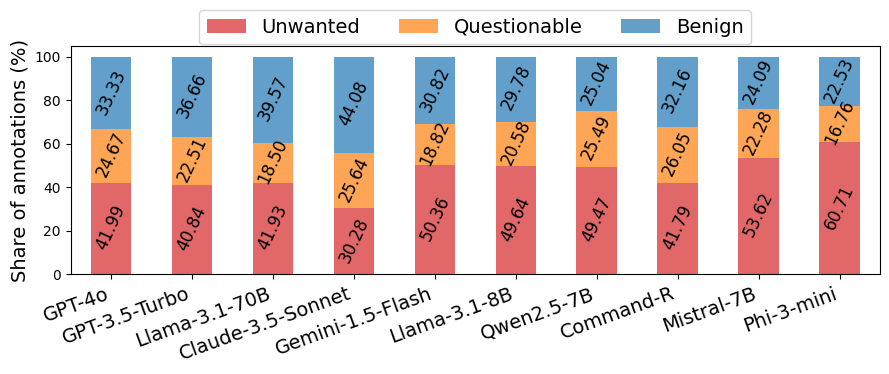

In [5]:
locals()["halu_eval-U-worst"].get_annotation_dist()

In [6]:
locals()["halu_eval-U-best"].get_annotation_dist()

KeyError: 'halu_eval-U-best'

## Sample-level final label desitribuiton

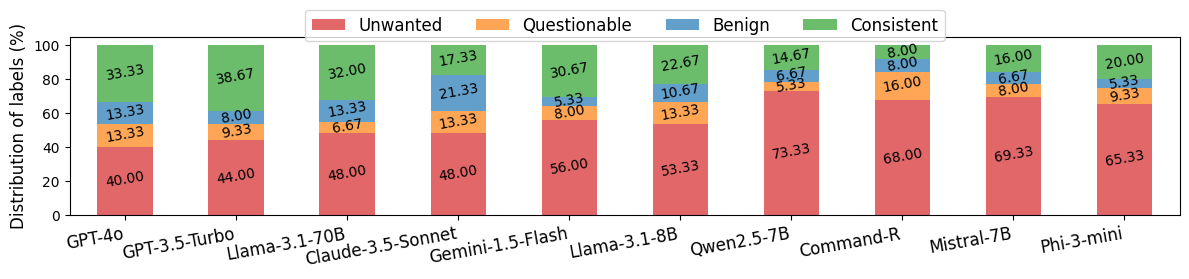

In [6]:
locals()["halu_eval-U-worst"].get_sample_dist()

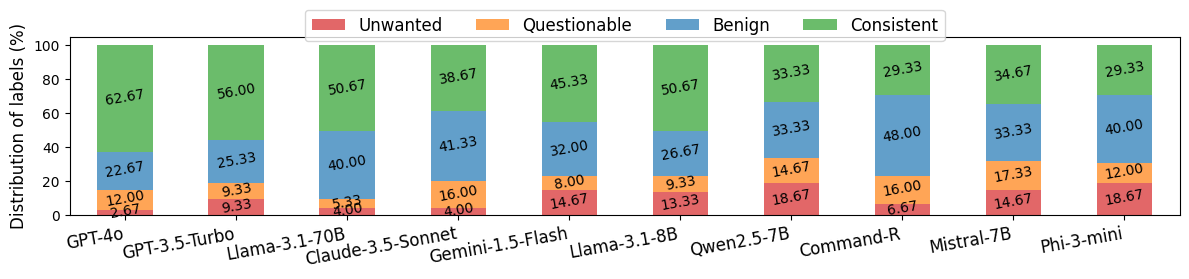

In [7]:
locals()["halu_eval-U-best"].get_sample_dist()

## Hallucination rates vs. passage length

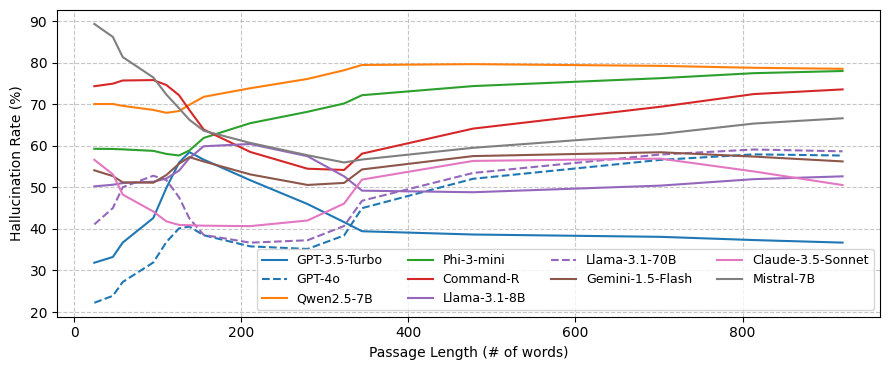

In [8]:
locals()["halu_eval-U-worst"].halu_vs_length('source')

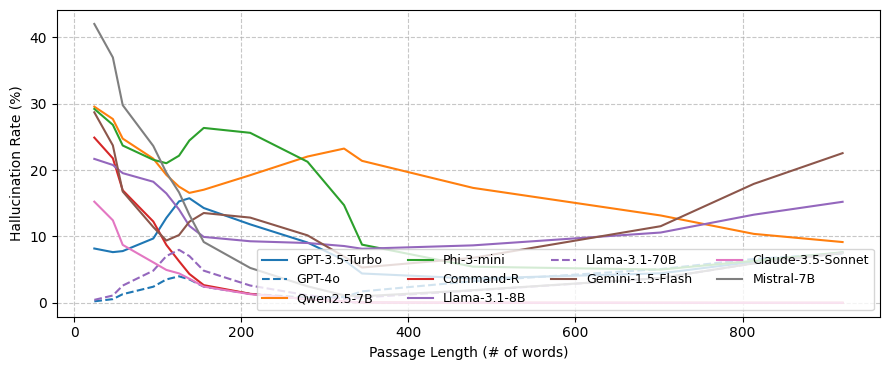

In [9]:
locals()["halu_eval-U-best"].halu_vs_length('source')

## Hallucination rates vs. summary length

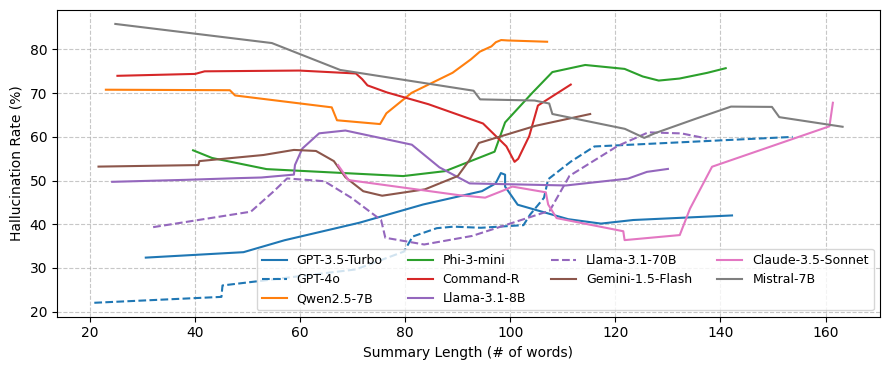

In [10]:
locals()["halu_eval-U-worst"].halu_vs_length('summary')

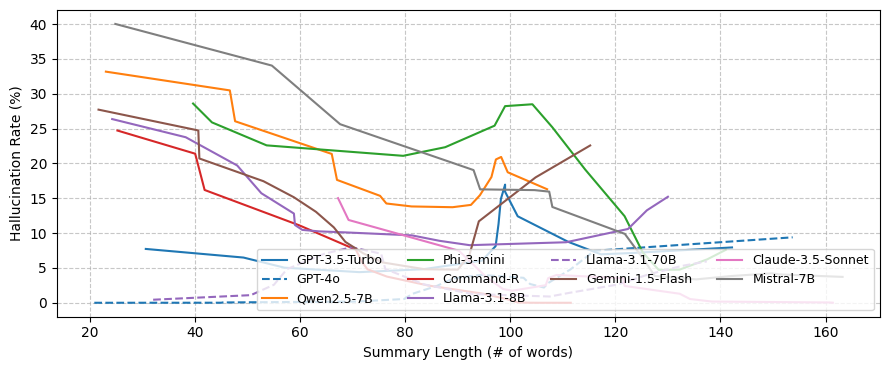

In [11]:
locals()["halu_eval-U-best"].halu_vs_length('summary')

## avg. annotation count vs. passage length 
avg. annotation count: for each sample, number of a label / number of annotators

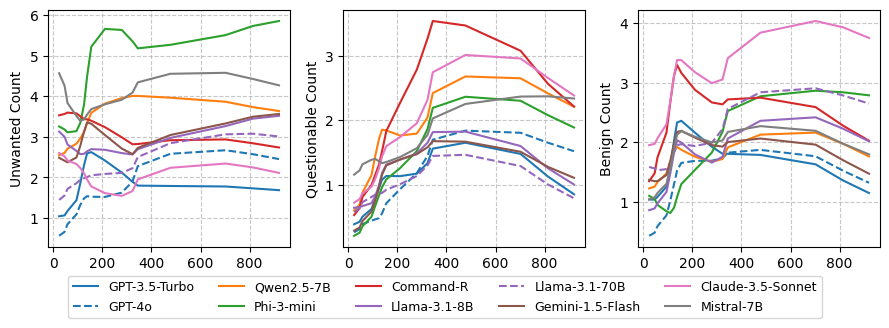

In [12]:
locals()["halu_eval-U-worst"].label_vs_length(mode = 'count', length_of='source')

## annotation ratio vs. passage length

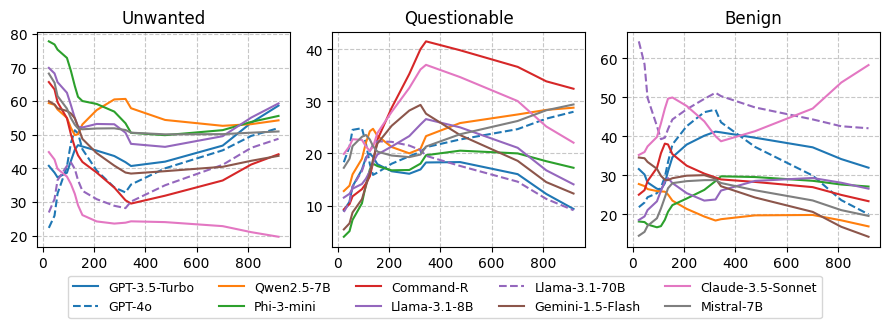

In [13]:
locals()["halu_eval-U-worst"].label_vs_length(mode = 'ratio', length_of='source')